In [1]:
!pip install tf-nightly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.7/524.7 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.9/440.9 kB 35.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 55.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 55.4 MB/s eta 0:00:00


In [2]:
import tensorflow as tf 
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
sentiment=['noVideo','amusing-1','amusing-2','boring-1','boring-2','relaxed-1','relaxed-2','scary-1','scary-2','noVideo','startVid','bluVid','endVid']

In [17]:
def choose_subjects(Number):

    annotations_df = pd.read_csv('/content/drive/MyDrive/Anno/sub_1.csv')
    physiological_df = pd.read_csv('/content/drive/MyDrive/Physio/sub_1.csv')
    for i in range(2,Number+1) :
        chemin1='/content/drive/MyDrive/Anno/sub_{}.csv'.format(i)
        chemin2='/content/drive/MyDrive/Physio/sub_{}.csv'.format(i)
        annotations_df = pd.concat([annotations_df,pd.read_csv(chemin1)],axis=0)
        physiological_df = pd.concat([physiological_df,pd.read_csv(chemin2)],axis=0)
    return annotations_df,physiological_df

In [5]:
def select_rows_join_on_time(i):
    if i%50==0:
        return True
    else:
        return False

In [6]:
def synchronize(anno_df,physio_df):
  physio_timejoint_df=physio_df.iloc[[select_rows_join_on_time(i) for i in range(len(physio_df))]]
  physio_timejoint_df.reset_index(inplace=True,drop=True)
  anno_df.reset_index(inplace=True ,drop=True)
  df1 = pd.concat([physio_timejoint_df,anno_df],axis=1)
  return df1


In [8]:
def select_rows_median(df):
    df=df.iloc[:,1:-1]
    rolling_median = df.rolling(window=50, min_periods=1).median()
    result = pd.DataFrame({'ecg': rolling_median['ecg'][49::50].values, 
                        'bvp': rolling_median['bvp'][49::50].values, 
                        'gsr': rolling_median['gsr'][49::50].values,
                        'rsp': rolling_median['rsp'][49::50].values,
                        'skt': rolling_median['skt'][49::50].values,
                        'emg_zygo': rolling_median['emg_zygo'][49::50].values,
                        'emg_coru': rolling_median['emg_coru'][49::50].values,
                        'emg_trap': rolling_median['emg_trap'][49::50].values})
    last_median = df.tail(34).median()
    result = result.append(last_median.to_dict(), ignore_index=True)
    return result

In [9]:
def select_rows_mean(df):
    df=df.iloc[:,1:-1]
    rolling_median = df.rolling(window=50, min_periods=1).mean()
    result = pd.DataFrame({'ecg': rolling_median['ecg'][49::50].values, 
                        'bvp': rolling_median['bvp'][49::50].values, 
                        'gsr': rolling_median['gsr'][49::50].values,
                        'rsp': rolling_median['rsp'][49::50].values,
                        'skt': rolling_median['skt'][49::50].values,
                        'emg_zygo': rolling_median['emg_zygo'][49::50].values,
                        'emg_coru': rolling_median['emg_coru'][49::50].values,
                        'emg_trap': rolling_median['emg_trap'][49::50].values})
    last_mean = df.tail(34).mean()
    result = result.append(last_mean.to_dict(), ignore_index=True)
    return result

In [ ]:
visual_df = pd.read_csv('/content/drive/MyDrive/physiological/sub_1.csv')
df_subset_ecg = visual_df.iloc[:,1]
df_subset_bvp = visual_df.iloc[:,2]
df_subset_gsr = visual_df.iloc[:, 3]
df_subset_rsp = visual_df.iloc[:,4]
df_subset_skt = visual_df.iloc[:,:5]
df_subset_emg_zygo = visual_df.iloc[:,6]
df_subset_emg_coru = visual_df.iloc[:, 7]
df_subset_emg_trap = visual_df.iloc[:, 8]

trace1 = go.Scatter(x=df_subset_ecg.index, y=df_subset_ecg.values, mode='lines', name='ecg', line=dict(color='blue'))
trace2 = go.Scatter(x=df_subset_bvp.index, y=df_subset_bvp.values, mode='lines', name='bvp', line=dict(color='green'))
trace3 = go.Scatter(x=df_subset_gsr.index, y=df_subset_gsr.values, mode='lines', name='gsr', line=dict(color='red'))
trace4 = go.Scatter(x=df_subset_rsp.index, y=df_subset_rsp.values, mode='lines', name='rsp', line=dict(color='purple'))
trace5 = go.Scatter(x=df_subset_skt.index, y=df_subset_skt.values, mode='lines', name='skt', line=dict(color='grey'))
trace6 = go.Scatter(x=df_subset_emg_zygo.index, y=df_subset_emg_zygo.values, mode='lines', name='emg_zygo', line=dict(color='brown'))
trace7 = go.Scatter(x=df_subset_emg_coru.index, y=df_subset_emg_coru.values, mode='lines', name='emg_coru', line=dict(color='yellow'))
trace8 = go.Scatter(x=df_subset_emg_trap.index, y=df_subset_emg_trap.values, mode='lines', name='emg_trap', line=dict(color='orange'))

layout = go.Layout(title='Figure des signaux ECG', xaxis=dict(title='temps'), yaxis=dict(title='Signal'))

fig = go.Figure(data=[trace1, trace2, trace3, trace4,trace5, trace6, trace7, trace8], layout=layout)

fig.show()

In [10]:
def scale_features(df):
  features_df = df.iloc[:,11:13]
  features_scaled=features_df.values
  #features_scaled = features_scaled.reshape(-1,1) #uncomment if using 1 feature
  min_max_scaler = sk.preprocessing.MinMaxScaler()
  features_scaled=min_max_scaler.fit_transform(features_scaled)
  target_df=df.iloc[:,13]
  target=target_df.values
  return features_scaled,target



In [11]:
  from tensorflow.keras import *
  from tensorflow.keras.layers import *

In [12]:
def train_test(features_scaled,target):
  x_Train, x_Test, y_Train, y_Test = train_test_split(features_scaled, target, test_size = 0.2, random_state = 6)
  x_Train = x_Train.reshape((x_Train.shape[0], x_Train.shape[1], 1))
  x_Test = x_Test.reshape((x_Test.shape[0], x_Test.shape[1], 1))
  return x_Train,x_Test,y_Train,y_Test

In [13]:
class AccuracyThresholdCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.85 :
            print("\nReached 89% accuracy, stopping training.")
            self.model.stop_training = True

In [14]:
def create_model_compiled(x_Train):
  model = Sequential()
  model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(x_Train.shape[1], 1)))
  model.add(Conv1D(filters=128, kernel_size=1, activation='relu'))
  model.add(Conv1D(filters=256, kernel_size=1, activation='relu'))
  model.add(Conv1D(filters=512, kernel_size=1, activation='relu'))
  model.add(MaxPooling1D(pool_size=1))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(13, activation='softmax'))
  return model

In [15]:

from sklearn.metrics import precision_score, recall_score, f1_score
from tensorflow.keras.metrics import Precision, Recall,F1Score,Accuracy
def model_training(df1,df2):
  precision = Precision()
  recall = Recall()
  f1_score = F1Score()
  accuracy = Accuracy()
  x_Train,x_Test,y_Train,y_Test=train_test(df1,df2)
  model = create_model_compiled(x_Train)
  model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',metrics='accuracy')
  model.fit(x_Train, y_Train, epochs=3, batch_size=32,callbacks=[AccuracyThresholdCallback()])
  precision, recall  = model.evaluate(x_Test, y_Test)
  L=[]
  L.append(precision)
  L.append(recall)
  #L.append(f1_score)
 # L.append(accuracy)
  return L

In [24]:
coordinates1=[]
for i in range(4):
  anno_df,physio_df = choose_subjects(i)
  df_syncro=synchronize(anno_df,physio_df)
 # physio_mean_df = select_rows_mean(physio_df)
#  physio_mean_df = pd.concat([physio_mean_df,anno_df],axis=1)
 # physio_median_df = select_rows_median(physio_df)
#  physio_median_df = pd.concat([physio_median_df,anno_df],axis=1)
  
 # coordinates2=[]
 # coordinates3=[]
  scaled_features,target=scale_features(df_syncro)
 # scaled_mean_features,target=scale_features(physio_mean_df)
 # scaled_median_features,target=scale_features(physio_median_df)
  coordinates1.append(model_training(scaled_features,target))
 # coordinates2.append(model_training(scaled_mean_features,target))
#  coordinates3.append(model_training(scaled_median_features,target))


Epoch 1/3
1226/1226 [==============================] - 22s 17ms/step - loss: 0.9944 - accuracy: 0.6821
Epoch 2/3
1226/1226 [==============================] - 20s 17ms/step - loss: 0.7175 - accuracy: 0.7826
Epoch 3/3
307/307 [==============================] - 1s 4ms/step - loss: 0.6248 - accuracy: 0.8148
Epoch 1/3
1226/1226 [==============================] - 22s 17ms/step - loss: 0.9874 - accuracy: 0.6834
Epoch 2/3
1226/1226 [==============================] - 21s 17ms/step - loss: 0.7090 - accuracy: 0.7869
Epoch 3/3
307/307 [==============================] - 1s 3ms/step - loss: 0.6349 - accuracy: 0.8115
Epoch 1/3
2452/2452 [==============================] - 42s 16ms/step - loss: 1.1464 - accuracy: 0.6336
Epoch 2/3
2452/2452 [==============================] - 40s 16ms/step - loss: 0.9189 - accuracy: 0.7141
Epoch 3/3
613/613 [==============================] - 3s 5ms/step - loss: 0.8567 - accuracy: 0.7305
Epoch 1/3
3678/3678 [==============================] - 67s 18ms/step - loss: 1.0417 -

In [25]:
list_range=len(coordinates1)

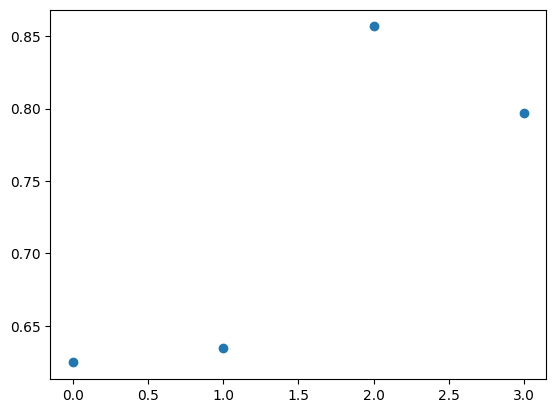

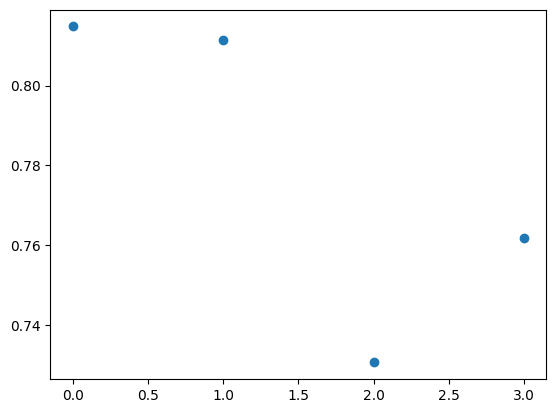

In [27]:
y1=[]
y2=[]
x=[]
for i in range(list_range):
  x.append(i)
  y1.append(coordinates1[i][0])
  y2.append(coordinates1[i][1])
plt.scatter(x,y1)
plt.show()
plt.scatter(x,y2)
plt.show()